In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)


#reading the data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [3]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
m = len(X)

#using the formula to calculate b0,b1
numer = 0
denom = 0
for i in range(m):
    numer+= (X[i] - mean_x) * (Y[i] - mean_y)
    denom+= (X[i]-mean_x) **2
    
b1=numer/denom
b0 = mean_y - (b1*mean_x)

print(b0,b1)


325.57342104944223 0.26342933948939945


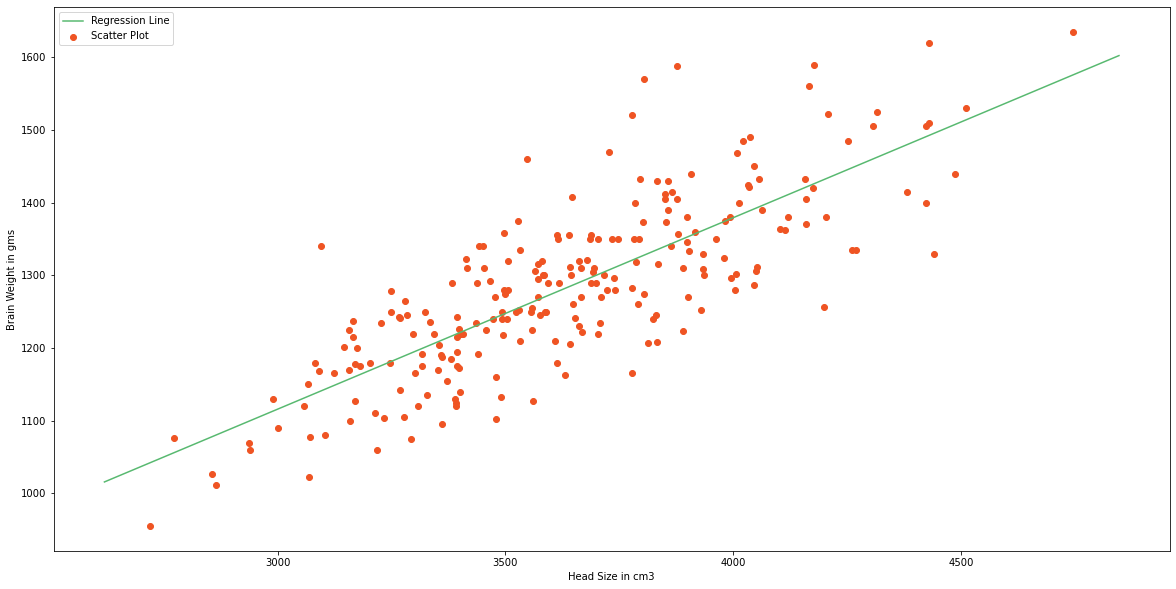

In [5]:
#plotting values and linear regression
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y=b0+b1*x

#plotting line
plt.plot(x,y,color='#58b970' , label ='Regression Line')

#plotting scatter points
plt.scatter(X,Y,c='#ef5423', label='Scatter Plot')

plt.xlabel("Head Size in cm3")
plt.ylabel("Brain Weight in gms")
plt.legend()
plt.show()

<font color='blue'>To see how good our model is, we will use r square method</font>

In [6]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r+= (Y[i]-y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


<font color='blue'>now we will use sklearn ml library to do the same task. But it will require very few lines of code</font>

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank1 matrix in scikit learn
X = X.reshape((m,1))

#creating model
reg = LinearRegression()

#fitting training data
reg = reg.fit(X,Y)

#Y prediction
Y_pred = reg.predict(X)

#calculating r2 score
r2 = reg.score(X,Y)

print(r2)

0.639311719957
